Input: Ochre Equipment Reading Output
Trains Regression models based on 15 minute increments of , Node Temp, Draw Data, and Setpoint

In [ ]:
#import data
import pandas as pd
import numpy as np

#Data transformation, Y-values are y_i+1 temperatures for the next hour
def rolling_subsets(input_list, window_size = 4):
    if window_size > len(input_list) or window_size <= 0:
        raise ValueError("Window size must be positive and not greater than the list length.")
    
    return [input_list[i*window_size:i*window_size + window_size] for i in range(int(len(input_list)/window_size))]

import numpy as np

def csv_to_features(df): #exports features, y = 15 minute increment predictions for 1 hour of outlet temperature
    #x = 15 minute increment predictions for setpoint and draw data, live readings for node temperature
    #include = True - includes node temperatures, x4/x5
    y_col = df["Hot Water Outlet Temperature (C)"]
    window = 8 #2 hours
    result = rolling_subsets(y_col, window)

    # Create feature vectors
    x1 = df["Hot Water Average Temperature (C)"]
    x2 = rolling_subsets(df["Draw Data (L)"], window)
    x3 = rolling_subsets(df["Setpoint (C)"], window)
    x4 = df["T_WH3 Temperature (C)"]
    x5 = df["T_WH10 Temperature (C)"]

    print(len(result), len(x2), len(x3))

    y = result[:-1]  # Remove the first index to offset, y = i+1th prediction
    #x1_v = x1[:-window]  # average temperature
    x2_v = x2[:-1] #draw values
    x3_v = x3[:-1] #setpoint values
    x4_v = x4[:-window - 2:window] #note temperatures should only be taken at current time interval (live readings)
    x5_v = x5[:-window - 2:window]

    print(len(y) , len(x2_v), len(x3_v), len(x4_v))

    # Stack features
    X = np.column_stack([x2_v, x3_v, x4_v, x5_v]) #Node 10 x5_v

    return X, y


In [2]:
#data = pd.read_csv("output_site_10292.csv")  90023
#data = pd.read_csv("output_site_90023.csv")
#X, y = csv_to_features(data)

#data1 = pd.read_csv("output_site_null.csv")
#X1, y1 = csv_to_features(data1)

data = pd.read_csv("output_site_large.csv")
X, y = csv_to_features(data)




770858 96357 96357
96356 770850 96356 96356


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 96356 and the array at index 2 has size 770850

In [3]:
#Train test split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
r_sq = model.score(X_train, y_train)
print(f"Training coefficient of determination: {r_sq}")
y_predict = model.predict(X_test)
test_r_sq = model.score(X_test, y_test)
print(f"Test coefficient of determination: {test_r_sq}")
mse = mean_squared_error(y_test, y_predict, multioutput='uniform_average')
print("Mean Squared Error:", mse)

Training coefficient of determination: 0.37585487335834106
Test coefficient of determination: 0.3743623164758852
Mean Squared Error: 8.176818804412665


In [103]:
model.coef_

array([[ 4.28729546e-03, -4.33108765e-02,  1.27352464e-02,
        -2.43374033e-03, -3.83946027e-03, -4.03946218e-03,
        -4.24747891e-03, -2.18356714e-03, -5.41514850e-03,
        -5.45291077e-03, -7.66125495e-03, -5.68021463e-03,
        -9.18578236e-03, -1.10215533e-02, -9.27036391e-03,
        -1.44252643e-02,  5.14494535e-02, -5.89738415e-03,
        -1.30364383e-02,  1.45075049e-02,  2.29923736e-02,
        -1.07454139e-02, -7.92881175e-03,  1.43571139e-02,
         1.59826810e-02, -3.38485505e-03, -1.38985692e-02,
         2.45626742e-02,  6.84787582e-04,  6.57368234e-03,
        -1.80951806e-02,  2.62277605e-02,  8.76042854e-01,
        -4.59787590e-03],
       [ 2.55453922e-02, -1.07572458e-01, -2.20356937e-02,
         9.20840957e-03, -1.54468043e-03, -2.46107715e-03,
        -4.39706188e-03, -2.48105933e-03, -3.40979790e-03,
        -8.83891186e-03, -9.54561445e-03, -7.23636098e-03,
        -1.09128768e-02, -1.41367440e-02, -1.21202181e-02,
        -1.70767222e-02,  5.34

In [104]:
i = 96 + 8 * 50

print("Input: ")
print(X_test[i])
print("Hot Water Outlet: ")
print(y_test[i])

print("Predicted Hot Water Outlet Temperature: " ) 
y_predict[i]

Input: 
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.25236067
  0.          0.          0.          0.         49.5        49.5
 49.5        52.46533333 55.06       55.06       55.06       55.06
 55.06       55.06       55.06       55.06       55.06       55.06
 55.06       49.12933333 52.0777339  31.11768466]
Hot Water Outlet: 
402501    51.939531
402502    51.829341
402503    51.798749
402504    52.074029
402505    52.714207
402506    53.458654
402507    54.688013
402508    54.926770
402509    54.993590
402510    54.872511
402511    54.835971
402512    54.715057
402513    54.741097
402514    54.620950
402515    54.589124
402516    54.468937
Name: Hot Water Outlet Temperature (C), dtype: float64
Predicted Hot Water Outlet Temperature: 


array([52.37561349, 52.31885845, 52.29315087, 52.38457   , 52.49498437,
       52.61816872, 52.77041142, 52.90224027, 53.02558093, 53.15299461,
       53.26996144, 53.37022035, 53.47289959, 53.57760816, 53.6679422 ,
       53.54735933])

In [26]:
# get coefficients of model
#pd.DataFrame(zip(X_train.columns, model.coef_))
model.coef_

array([[ 3.22339255e-02, -1.40094524e-01,  7.00293531e-02,
        -1.46019326e-03, -1.40545834e-02, -3.69684001e-03,
        -2.81498382e-02, -3.21872384e-02,  6.18407808e-02,
        -3.50399545e-03, -2.17250387e-02,  3.94677535e-02,
         1.03932595e-02,  1.02359343e-02, -3.30666902e-02,
         5.48999307e-02,  8.46176845e-01],
       [ 1.33104044e-01, -2.68943918e-01, -8.99954710e-02,
         4.78065672e-02, -1.61696844e-02, -8.19595736e-03,
        -1.79830491e-02, -2.63066097e-02,  6.56234910e-02,
         7.84172848e-03, -4.75579328e-05,  1.82348765e-02,
         2.85759273e-02,  2.68325047e-03, -3.06721096e-02,
         5.59376147e-02,  8.14695070e-01],
       [ 1.32100449e-01, -1.56961530e-01, -2.27688089e-01,
        -1.18571449e-01,  3.82244976e-02, -1.05364471e-02,
        -2.17819120e-02, -1.33557979e-02,  8.03876417e-02,
        -1.22125617e-02,  2.64300720e-02,  3.18342587e-02,
         1.86362657e-02,  8.19112365e-03, -3.21539278e-02,
         5.85717992e-02,  7.8

In [8]:
error = (y_test[0] - y_predict[0]) / y_test[0]
#np.sum(error)/len(error)
error


46669   -0.016614
46670   -0.017186
46671   -0.014338
46672   -0.015125
Name: Hot Water Outlet Temperature (C), dtype: float64

In [113]:
#validation test
#val_data = pd.read_csv("output_site_10441.csv")
val_data = pd.read_csv("output_site_90023.csv")
#val_data = pd.read_csv("output_site_null.csv")
X_val, y_val = csv_to_features(val_data)

844800 844785 844785
844784 844784 844784 844784
39.41643795734582 39.41643795734583


In [114]:
#error metrics
from sklearn.metrics import r2_score
y_predict_val = model.predict(X_val)

r_2_val = r2_score(y_val, y_predict_val)
print(f"test coefficient of determination: {r_2_val}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_predict_val, multioutput='uniform_average')
print("Mean Squared Error:", mse)

test coefficient of determination: 0.8959084623572117
Mean Squared Error: 2.8773985396120283


In [119]:
i = 96 * 20 + 8 * 3
i = 96 * 20 + 8 * 9
print("Input: ")
print(X_val[i])
print("Hot Water Outlet: ")
print(y_val[i])

print("Predicted Hot Water Outlet Temperature: " ) 
y_predict_val[i]




Input: 
[ 0.          7.82318067  0.          0.          0.          0.
  9.58970533 10.85150867  0.50472133  0.757082    1.26180333  0.
  0.25236067  0.25236067  0.25236067  0.         40.         40.
 40.         40.         40.         40.         40.         40.
 40.         40.         40.         42.96533333 45.56       45.56
 45.56       42.59466667 44.6930026  22.10740791]
Hot Water Outlet: 
1993    44.619869
1994    42.763036
1995    42.650742
1996    42.539562
1997    42.429471
1998    42.320444
1999    13.083977
2000    26.746946
2001    35.796280
2002    40.851428
2003    40.103395
2004    40.042957
2005    39.972462
2006    39.727981
2007    39.639770
2008    39.552219
Name: Hot Water Outlet Temperature (C), dtype: float64
Predicted Hot Water Outlet Temperature: 


array([44.40499276, 43.78581974, 43.82859713, 43.70294776, 43.79427746,
       43.60449753, 42.59125257, 41.97642046, 42.03146724, 41.90395174,
       41.97898148, 42.22285706, 42.38386977, 42.73175684, 43.24726101,
       43.59210122])

C:\Users\janel\AppData\Local\Temp\ipykernel_14264\150363685.py:35: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  datetime_list = pd.date_range(start=start_time, end=end_time, freq="15T")
C:\Users\janel\AppData\Local\Temp\ipykernel_14264\150363685.py:76: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper left", bbox_to_anchor=(1.1, 0.75))  # Adjust values as needed


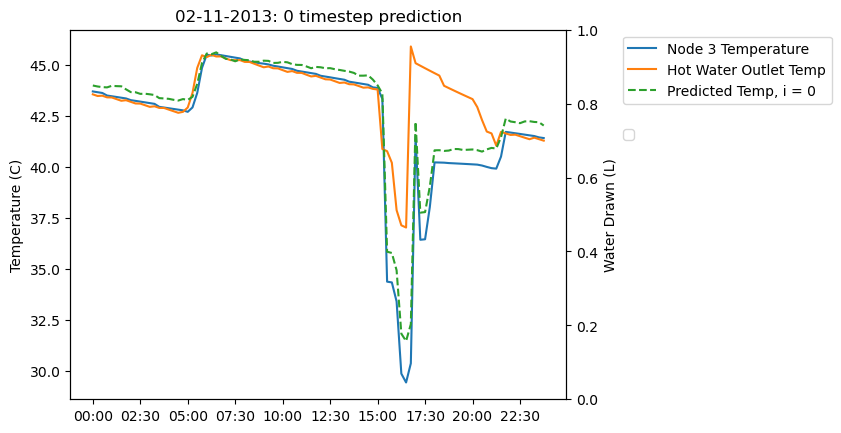

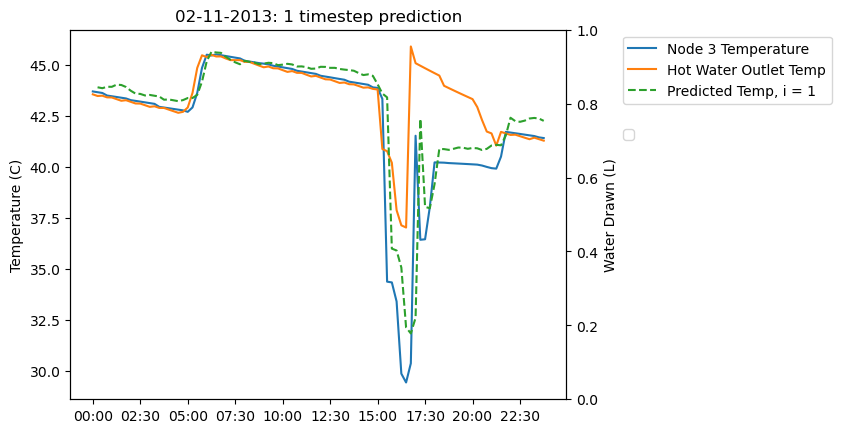

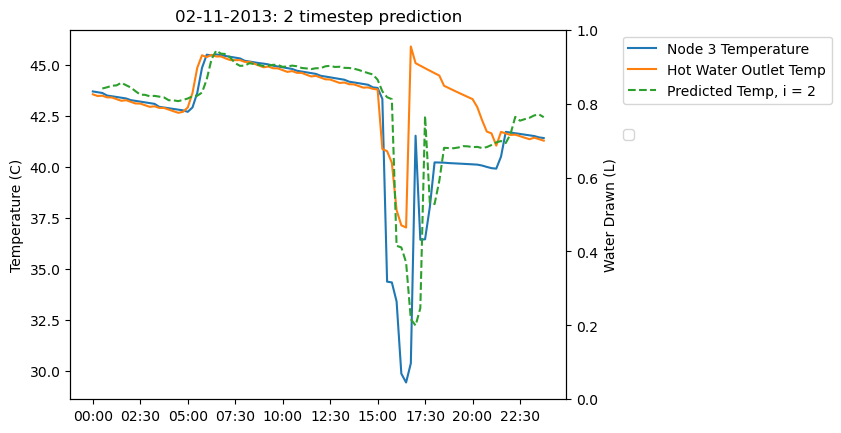

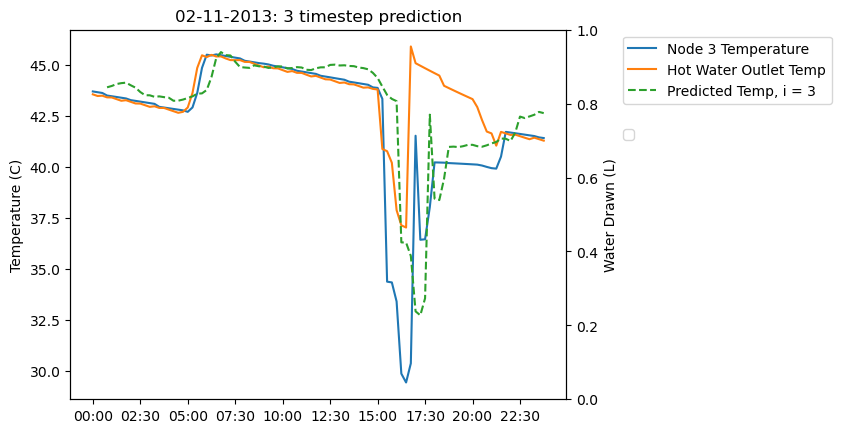

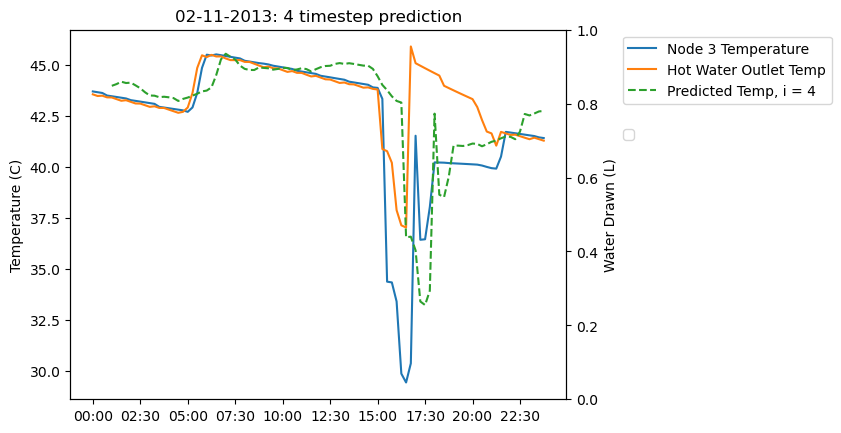

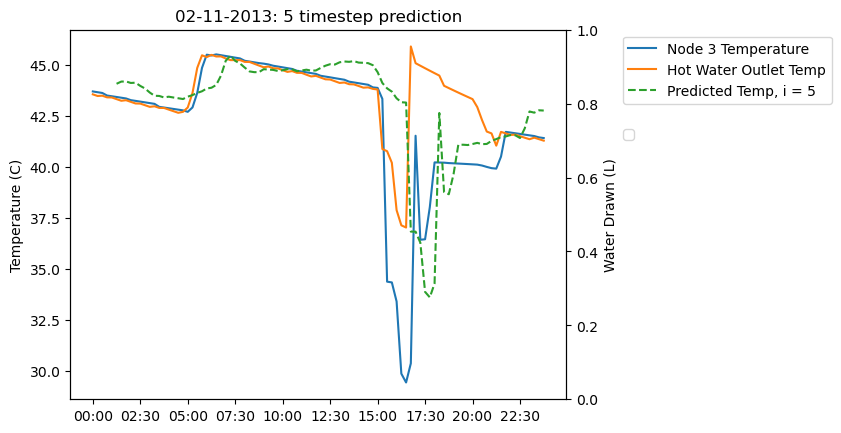

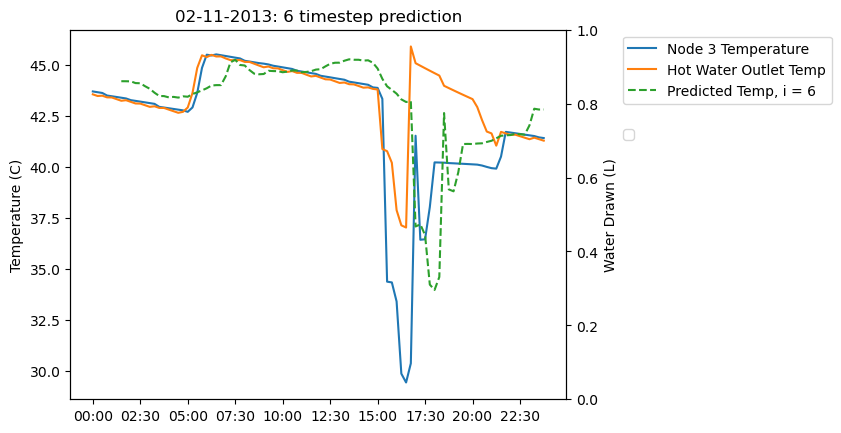

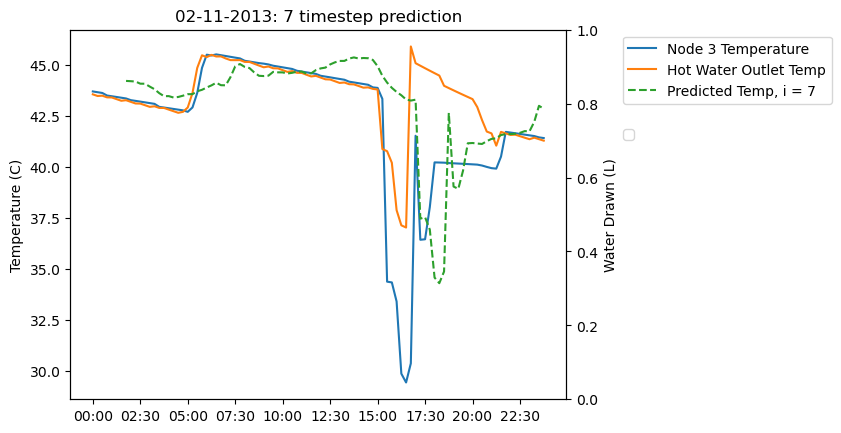

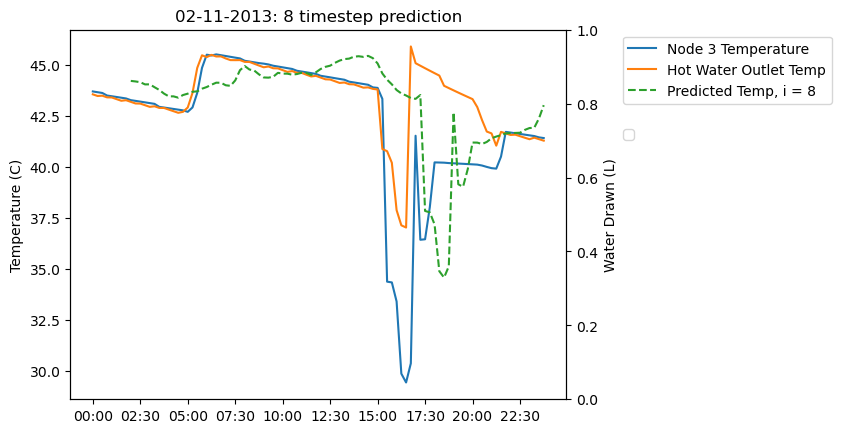

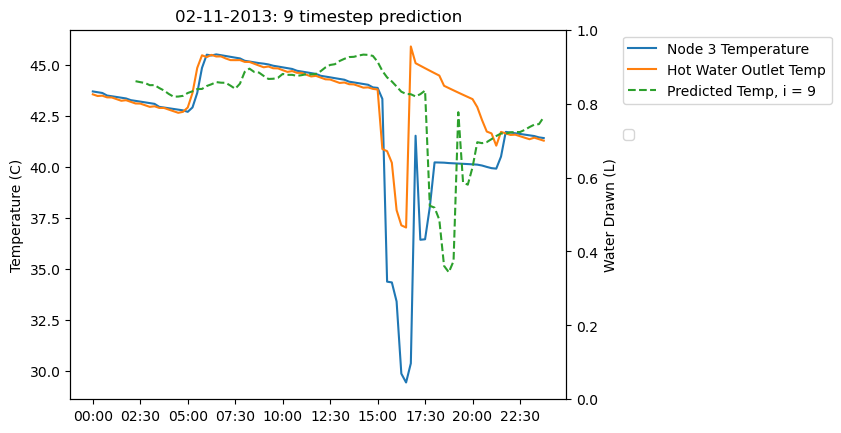

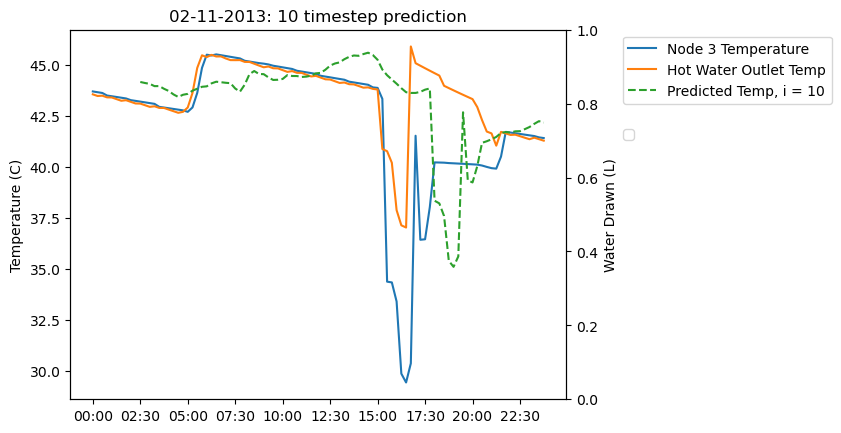

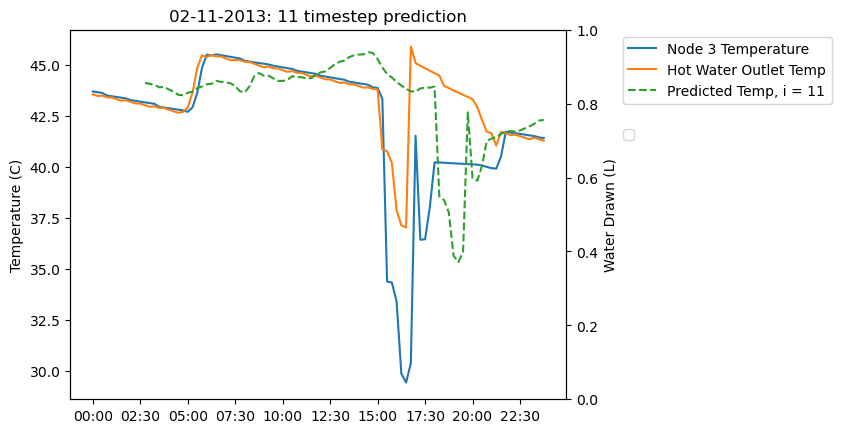

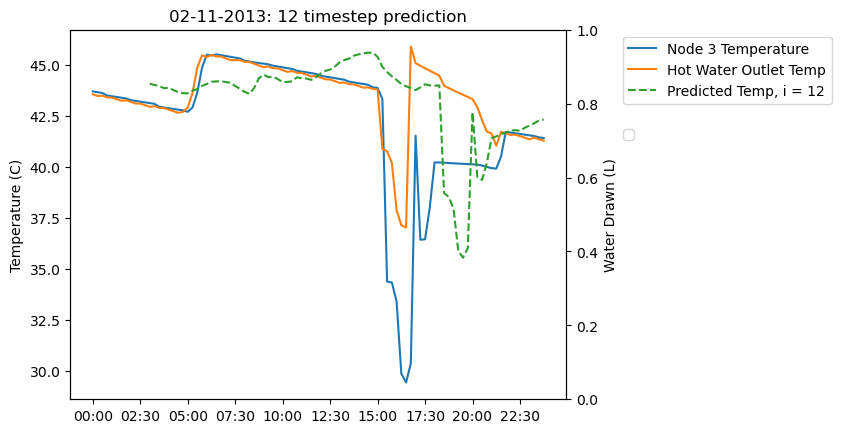

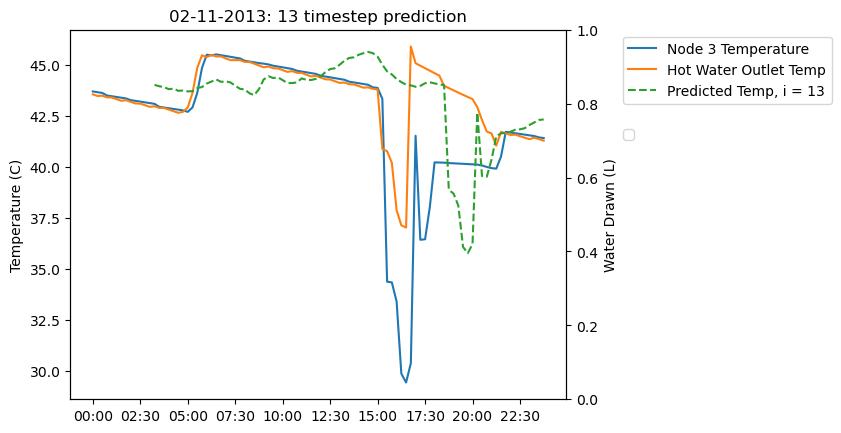

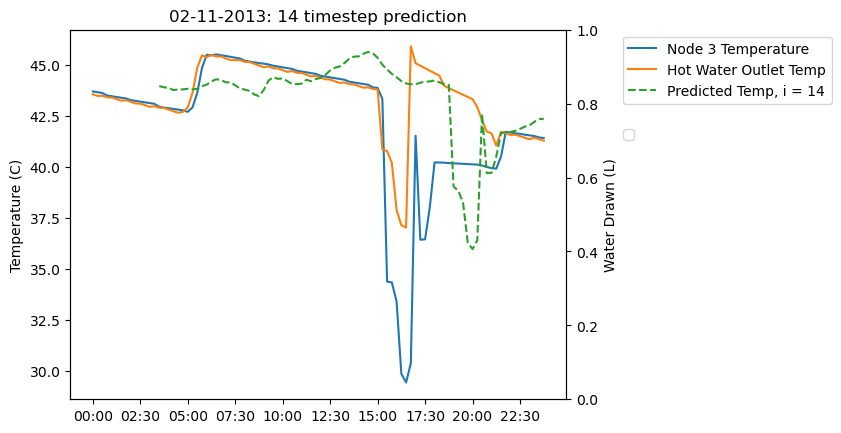

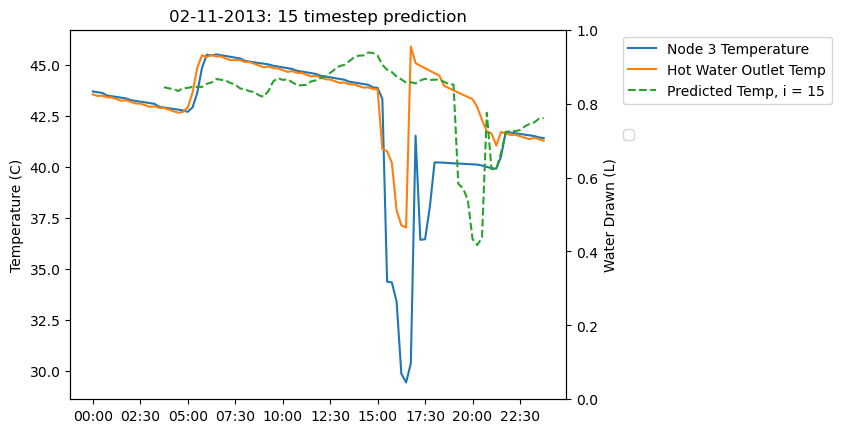

In [117]:
import matplotlib.pyplot as plt
#Create validation graphics

#get data for 1 day
#1440 minutes in a day / 15 = 96 windows in a day
days = {25}
window = 0
i = 16
for time_i in range(i):
    for day in days:
        x_day = X_val[(96*day):(96* day) + 96]
        #avg_temp_day = x_day[:, 0]
        draw_data_day = x_day[:, 0]
        setpoint_day = x_day[:, 8]
        node_3_temp_day = x_day[:, -2]
        node_10_temp_day = x_day[:, -1]
        y_day = y_val[(96 * day):(96 * day) + 96]
        y_day = [list(row) for row in zip(*y_day)]
        y_day = y_day[0]
        y_predict_day = y_predict_val[(96 * day):(96 * day) + 96]
        y_predict_day = y_predict_day[:, time_i]



    
        from datetime import datetime, timedelta
        

        #start_time = "00:00:00"
        start_time = datetime(2013, 1, 1, 0, 0, 0)
        #start_time = datetime.strptime(start_time, "%H:%M:%S")
        #end_time = "23:59:59"
        end_time = datetime(2013, 1, 1, 23, 59, 59)
        # Create datetime range with 15-minute intervals
        datetime_list = pd.date_range(start=start_time, end=end_time, freq="15T")

        # Convert to a list (optional)
        datetime_list = list(datetime_list)
        datetime_list = [dt.strftime("%H:%M") for dt in datetime_list]

        # initializing day number

        
        day_num = str((day + 17) % 365)
        
        # adjusting day num
        day_num.rjust(3 + len(day_num), '0')
        
        # Initialize year
        year = "2013"
        
        # converting to date
        res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")
        

        import matplotlib.dates as mdates
        plt.figure()
        #plt.plot(datetime_list, avg_temp_day, label = "Hot Water Avg Temp") #avg temp
        #plt.plot(datetime_list, setpoint_day, label = "Setpoint")
        plt.plot(datetime_list, node_3_temp_day, label = "Node 3 Temperature")
        #plt.plot(datetime_list, node_10_temp_day, label = "Node 10 Temperature")
        plt.plot(datetime_list, y_day, label = "Hot Water Outlet Temp")
        if time_i > 0:
            plt.plot(datetime_list[time_i:], y_predict_day[:-time_i], label = f"Predicted Temp, i = {time_i}", linestyle="dashed") #todo: add stagger of 15 minutes
        else:
            plt.plot(datetime_list, y_predict_day, label = f"Predicted Temp, i = {time_i}", linestyle="dashed") #todo: add stagger of 15 minutes
    
        plt.ylabel("Temperature (C)")
        plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1))  # Adjust values as needed
        

        plt.twinx()
        #plt.plot(datetime_list, draw_data_day, label="Draw Data", color="blue", linestyle="dotted")
        plt.ylabel("Water Drawn (L)")
    
        plt.legend(loc="upper left", bbox_to_anchor=(1.1, 0.75))  # Adjust values as needed

        plt.title(str(res)+ f": {time_i} timestep prediction")

        plt.xticks(datetime_list[::10])
        #plt.legend(loc='lower right')


In [92]:
datetime_list[time_i:]


['00:15',
 '00:30',
 '00:45',
 '01:00',
 '01:15',
 '01:30',
 '01:45',
 '02:00',
 '02:15',
 '02:30',
 '02:45',
 '03:00',
 '03:15',
 '03:30',
 '03:45',
 '04:00',
 '04:15',
 '04:30',
 '04:45',
 '05:00',
 '05:15',
 '05:30',
 '05:45',
 '06:00',
 '06:15',
 '06:30',
 '06:45',
 '07:00',
 '07:15',
 '07:30',
 '07:45',
 '08:00',
 '08:15',
 '08:30',
 '08:45',
 '09:00',
 '09:15',
 '09:30',
 '09:45',
 '10:00',
 '10:15',
 '10:30',
 '10:45',
 '11:00',
 '11:15',
 '11:30',
 '11:45',
 '12:00',
 '12:15',
 '12:30',
 '12:45',
 '13:00',
 '13:15',
 '13:30',
 '13:45',
 '14:00',
 '14:15',
 '14:30',
 '14:45',
 '15:00',
 '15:15',
 '15:30',
 '15:45',
 '16:00',
 '16:15',
 '16:30',
 '16:45',
 '17:00',
 '17:15',
 '17:30',
 '17:45',
 '18:00',
 '18:15',
 '18:30',
 '18:45',
 '19:00',
 '19:15',
 '19:30',
 '19:45',
 '20:00',
 '20:15',
 '20:30',
 '20:45',
 '21:00',
 '21:15',
 '21:30',
 '21:45',
 '22:00',
 '22:15',
 '22:30',
 '22:45',
 '23:00',
 '23:15',
 '23:30',
 '23:45']

C:\Users\janel\AppData\Local\Temp\ipykernel_28148\3873029130.py:34: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  datetime_list = pd.date_range(start=start_time, end=end_time, freq="15T")


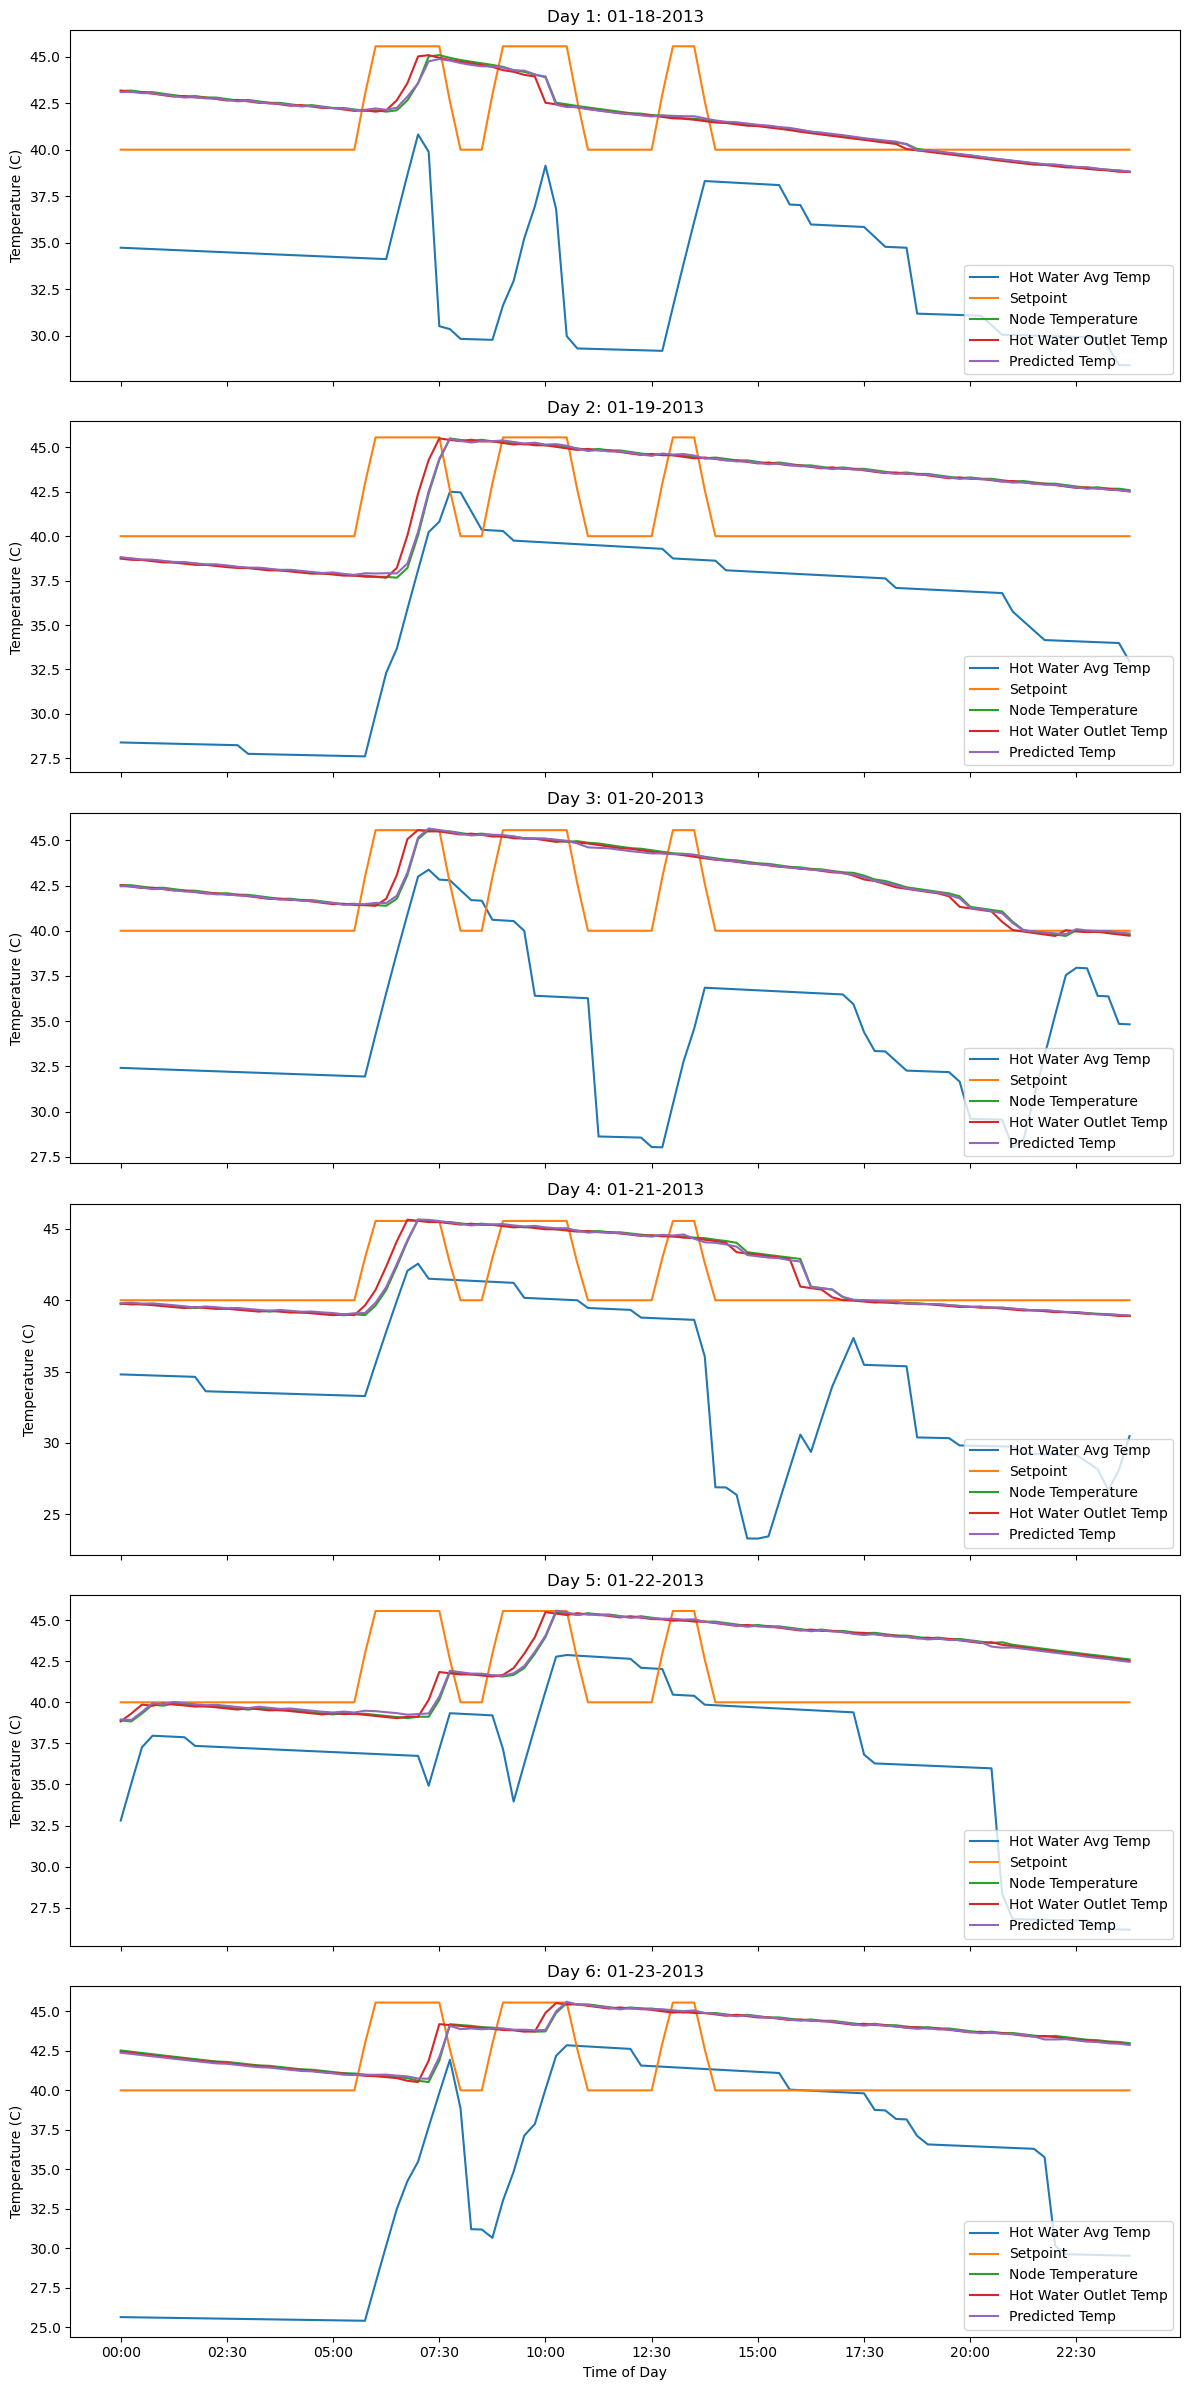

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

# Define the days to visualize
days = {1, 2, 3, 4, 5, 6}

# Create a figure with subplots (rows for each day)
fig, axes = plt.subplots(len(days), 1, figsize=(12, 4 * len(days)), sharex=True)

# Ensure axes is always iterable (even for a single subplot)
if len(days) == 1:
    axes = [axes]

for i, day in enumerate(days):
    x_day = X_val[(96 * day):(96 * day) + 96]
    avg_temp_day = x_day[:, 0]
    draw_data_day = x_day[:, 1]
    setpoint_day = x_day[:, 5]
    node_temp_day = x_day[:, 9]

    y_day = y_val[(96 * day):(96 * day) + 96]
    y_day = [list(row) for row in zip(*y_day)]
    y_day = y_day[0]

    y_predict_day = y_predict_val[(96 * day):(96 * day) + 96]
    y_predict_day = y_predict_day[:, 0]

    start_time = "00:00:00"
    end_time = "23:59:59"

    # Create datetime range with 15-minute intervals
    datetime_list = pd.date_range(start=start_time, end=end_time, freq="15T")
    datetime_list = [dt.strftime("%H:%M") for dt in datetime_list]

    # Format date for the title
    day_num = str((day + 17) % 365).rjust(3, '0')
    year = "2013"
    res = datetime.strptime(year + "-" + day_num, "%Y-%j").strftime("%m-%d-%Y")

    # Plot each day's data in a separate row
    ax = axes[i]
    ax.plot(datetime_list, avg_temp_day, label="Hot Water Avg Temp")
    ax.plot(datetime_list, setpoint_day, label="Setpoint")
    ax.plot(datetime_list, node_temp_day, label="Node Temperature")
    ax.plot(datetime_list, y_day, label="Hot Water Outlet Temp")
    ax.plot(datetime_list, y_predict_day, label="Predicted Temp")

    ax.set_title(f"Day {day}: {res}")
    ax.set_ylabel("Temperature (C)")
    ax.legend(loc="lower right")

# Set common x-axis labels
axes[-1].set_xticks(datetime_list[::10])
axes[-1].set_xlabel("Time of Day")

# Improve layout
plt.tight_layout()
plt.show()


In [ ]:
# We set Hot Water Outlet as our predicted value
import numpy as np
from sklearn.linear_model import LinearRegression

#Linear Regression
model = LinearRegression()
model.fit(X,y)
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")


coefficient of determination: 0.9860939061394864


In [63]:
from sklearn.linear_model import Lasso
#Lasso 
lasso = Lasso(alpha=1.0) # alpha is the regularization strength
lasso.fit(X, y)
lasso.score(X, y)

0.9857133554804913

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y)
clf.score(X, y)

0.9860939061394838

: 

[0.00625460712,
 -0.0417892614,
 0.01450787,
 -0.000148634945,
 -0.00165626542,
 -0.00398750475,
 -0.00401025626,
 -0.00294109852,
 0.888731644,
 -0.00514401545]

In [69]:
M

array([[ 6.25460712e-03, -4.17892614e-02,  1.45078700e-02,
        -1.48634945e-04, -1.65626542e-03, -3.98750475e-03,
        -4.01025626e-03, -2.94109852e-03,  8.88731644e-01,
        -5.14401545e-03],
       [ 2.77638753e-02, -1.05860217e-01, -2.05706913e-02,
         1.18870177e-02, -3.16097290e-04, -2.91305429e-03,
        -4.44793805e-03, -2.90759753e-03,  8.62335223e-01,
        -1.88669920e-03],
       [ 1.51693643e-02, -9.01459209e-02, -8.54562993e-02,
        -2.29734523e-02,  1.15367862e-02, -1.38193182e-03,
        -2.81366406e-03, -3.30682336e-03,  8.33101551e-01,
        -6.40011120e-04],
       [ 1.45554257e-02, -1.02992719e-01, -7.26927208e-02,
        -8.71559240e-02, -2.41501580e-02,  1.04887660e-02,
        -9.67297381e-04, -1.65804673e-03,  8.04262858e-01,
        -6.13514419e-04],
       [ 1.59764637e-02, -1.01098912e-01, -8.60682054e-02,
        -7.30539695e-02, -8.91306653e-02, -2.41711655e-02,
         9.82865577e-03,  9.01233712e-04,  7.76249087e-01,
        -1.

Model Coefficients: 
        [6.25460712e-03, -4.17892614e-02,  1.45078700e-02,
        -1.48634945e-04, -1.65626542e-03, -3.98750475e-03,
        -4.01025626e-03, -2.94109852e-03,  5.57711947e-02,
        -4.12871628e-03, -1.92634527e-02,  2.89880654e-02,
         1.03839646e-02,  4.27543933e-03, -2.30155374e-02,
         3.62389037e-02,  8.88731644e-01, -5.14401545e-03],
       [ 2.77638753e-02, -1.05860217e-01, -2.05706913e-02,
         1.18870177e-02, -3.16097290e-04, -2.91305429e-03,
        -4.44793805e-03, -2.90759753e-03,  5.82682483e-02,
         8.68213266e-03, -1.62680675e-03,  1.01281922e-02,
         2.56916233e-02, -3.15834816e-03, -2.10446746e-02,
         3.55276442e-02,  8.62335223e-01, -1.88669920e-03],
       [ 1.51693643e-02, -9.01459209e-02, -8.54562993e-02,
        -2.29734523e-02,  1.15367862e-02, -1.38193182e-03,
        -2.81366406e-03, -3.30682336e-03,  7.02235590e-02,
        -5.10075210e-03,  2.07881191e-02,  2.28335826e-02,
         1.54431650e-02,  3.10435917e-03, -2.40048971e-02,
         3.66494045e-02,  8.33101551e-01, -6.40011120e-04],
       [ 1.45554257e-02, -1.02992719e-01, -7.26927208e-02,
        -8.71559240e-02, -2.41501580e-02,  1.04887660e-02,
        -9.67297381e-04, -1.65804673e-03,  6.88879367e-02,
         9.19088439e-03,  5.36748804e-03,  4.70129494e-02,
         2.61752238e-02, -5.04828100e-03, -1.96994873e-02,
         3.59765419e-02,  8.04262858e-01, -6.13514419e-04],
       [ 1.59764637e-02, -1.01098912e-01, -8.60682054e-02,
        -7.30539695e-02, -8.91306653e-02, -2.41711655e-02,
         9.82865577e-03,  9.01233712e-04,  7.23084279e-02,
         1.39040304e-03,  2.46988117e-02,  2.73744080e-02,
         5.47915173e-02,  1.55808149e-03, -2.48843906e-02,
         3.84811029e-02,  7.76249087e-01, -1.34175681e-03],
       [ 1.09900244e-02, -9.31684910e-02, -8.61747063e-02,
        -8.74173110e-02, -7.58464384e-02, -8.87446600e-02,
        -2.55574887e-02,  1.35911660e-02,  7.13763518e-02,
         5.28459399e-03,  1.57597437e-02,  4.81736747e-02,
         3.37768118e-02,  3.18487505e-02, -2.12764775e-02,
         3.71605419e-02,  7.50147713e-01, -2.54332914e-03],
       [ 1.18276710e-02, -8.88973975e-02, -7.75248347e-02,
        -8.69995610e-02, -8.98479955e-02, -7.42300517e-02,
        -9.07444324e-02, -1.85131922e-02,  7.31369099e-02,
        -4.88046871e-04,  2.37528100e-02,  3.57408749e-02,
         5.82218647e-02,  7.59767931e-03,  1.14982613e-02,
         3.83875961e-02,  7.25159239e-01, -4.14010272e-03],
       [ 2.61027990e-02, -8.31925185e-02, -7.55482374e-02,
        -8.09662976e-02, -8.88863543e-02, -8.95595424e-02,
        -7.73536288e-02, -9.23762527e-02,  6.82204451e-02,
         7.10422024e-03,  1.44099871e-02,  4.60600721e-02,
         4.21294528e-02,  3.60398764e-02, -1.55777123e-02,
         7.32810268e-02,  7.01950982e-01, -5.62962301e-03]

Heavy draw example:
[ 9.58970533, 10.85150867,  0.50472133,  0.757082  , 40.        ,
       40.        , 40.        , 40.        , 35.62154299, 30.26831141])

In [ ]:
import cvxpy as cp
import numpy as np

i = 8 #horizon
lambda_ = 1
l = 0.75 #soft constraint
n = 8
T_min = 40
T_max = 60

#example value
#model

M = np.array([[6.25460712e-03, -4.17892614e-02,  1.45078700e-02,
        -1.48634945e-04, -1.65626542e-03, -3.98750475e-03,
        -4.01025626e-03, -2.94109852e-03,  5.57711947e-02,
        -4.12871628e-03, -1.92634527e-02,  2.89880654e-02,
         1.03839646e-02,  4.27543933e-03, -2.30155374e-02,
         3.62389037e-02,  8.88731644e-01, -5.14401545e-03],
       [ 2.77638753e-02, -1.05860217e-01, -2.05706913e-02,
         1.18870177e-02, -3.16097290e-04, -2.91305429e-03,
        -4.44793805e-03, -2.90759753e-03,  5.82682483e-02,
         8.68213266e-03, -1.62680675e-03,  1.01281922e-02,
         2.56916233e-02, -3.15834816e-03, -2.10446746e-02,
         3.55276442e-02,  8.62335223e-01, -1.88669920e-03],
       [ 1.51693643e-02, -9.01459209e-02, -8.54562993e-02,
        -2.29734523e-02,  1.15367862e-02, -1.38193182e-03,
        -2.81366406e-03, -3.30682336e-03,  7.02235590e-02,
        -5.10075210e-03,  2.07881191e-02,  2.28335826e-02,
         1.54431650e-02,  3.10435917e-03, -2.40048971e-02,
         3.66494045e-02,  8.33101551e-01, -6.40011120e-04],
       [ 1.45554257e-02, -1.02992719e-01, -7.26927208e-02,
        -8.71559240e-02, -2.41501580e-02,  1.04887660e-02,
        -9.67297381e-04, -1.65804673e-03,  6.88879367e-02,
         9.19088439e-03,  5.36748804e-03,  4.70129494e-02,
         2.61752238e-02, -5.04828100e-03, -1.96994873e-02,
         3.59765419e-02,  8.04262858e-01, -6.13514419e-04],
       [ 1.59764637e-02, -1.01098912e-01, -8.60682054e-02,
        -7.30539695e-02, -8.91306653e-02, -2.41711655e-02,
         9.82865577e-03,  9.01233712e-04,  7.23084279e-02,
         1.39040304e-03,  2.46988117e-02,  2.73744080e-02,
         5.47915173e-02,  1.55808149e-03, -2.48843906e-02,
         3.84811029e-02,  7.76249087e-01, -1.34175681e-03],
       [ 1.09900244e-02, -9.31684910e-02, -8.61747063e-02,
        -8.74173110e-02, -7.58464384e-02, -8.87446600e-02,
        -2.55574887e-02,  1.35911660e-02,  7.13763518e-02,
         5.28459399e-03,  1.57597437e-02,  4.81736747e-02,
         3.37768118e-02,  3.18487505e-02, -2.12764775e-02,
         3.71605419e-02,  7.50147713e-01, -2.54332914e-03],
       [ 1.18276710e-02, -8.88973975e-02, -7.75248347e-02,
        -8.69995610e-02, -8.98479955e-02, -7.42300517e-02,
        -9.07444324e-02, -1.85131922e-02,  7.31369099e-02,
        -4.88046871e-04,  2.37528100e-02,  3.57408749e-02,
         5.82218647e-02,  7.59767931e-03,  1.14982613e-02,
         3.83875961e-02,  7.25159239e-01, -4.14010272e-03],
       [ 2.61027990e-02, -8.31925185e-02, -7.55482374e-02,
        -8.09662976e-02, -8.88863543e-02, -8.95595424e-02,
        -7.73536288e-02, -9.23762527e-02,  6.82204451e-02,
         7.10422024e-03,  1.44099871e-02,  4.60600721e-02,
         4.21294528e-02,  3.60398764e-02, -1.55777123e-02,
         7.32810268e-02,  7.01950982e-01, -5.62962301e-03]]
)


N = [[*ele[8:16]] for ele in M] #Setpoints
N = np.array(N)
M_new = [[*x[0:8], *x[-2:]] for x in M]

M = np.array(M_new)

x = [ 0.        ,  7.82318067,  0.        ,  0.        ,  0.        ,
        0.        ,  9.58970533, 10.85150867, 44.6930026 , 22.10740791]

# Construct the problem.
#declare variables
T = cp.Variable(i)
s = cp.Variable(i) #setpoint variables
z = cp.Variable(i)
objective = cp.Minimize(cp.sum(lambda_ * z**2 + (lambda_*l) * s))

constraints = [
    s >= 49,
    s <= T_max,
    T == M @ x + N @ s,
    z >= T_min - T,
    z >= 0
    ]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()

# Print results
print("Optimal T values:", T.value)
print("Optimal s values:", s.value)
print("Optimal objective value:", result)

Optimal T values: [42.77906181 42.09499094 42.04902835 41.81288997 41.80509277 41.52780884
 40.46536595 39.7194851 ]
Optimal s values: [40. 40. 40. 40. 40. 40. 40. 40.]
Optimal objective value: 240.07868860640394


In [33]:
M = np.array([[ 5.02033259e-04, -9.65960089e-02,  3.79383258e-02,
        -2.79630548e-03, -1.06578162e-02, -2.62974490e-03,
        -1.62293773e-02, -1.58854898e-02,  6.19961250e-02,
        -7.46107579e-03, -1.76866170e-02,  3.14758599e-02,
         1.33327842e-02,  4.74276756e-03, -2.59681146e-02,
         4.45518051e-02,  8.70782356e-01, -6.57375649e-03],
       [ 6.90218954e-02, -1.88578788e-01, -5.44980449e-02,
         2.62819263e-02, -1.18673541e-02, -4.35123554e-03,
        -1.20909190e-02, -1.55621798e-02,  6.27031215e-02,
         8.35032138e-03, -1.16995900e-03,  1.39390782e-02,
         2.74282536e-02,  1.75557649e-04, -2.58885729e-02,
         4.57931375e-02,  8.40114734e-01, -2.90497022e-03],
       [ 6.67691509e-02, -1.28133439e-01, -1.49376163e-01,
        -6.61130950e-02,  1.63260124e-02, -4.90253324e-03,
        -1.40575731e-02, -1.05195144e-02,  7.61838013e-02,
        -9.70924893e-03,  2.50401085e-02,  2.59199957e-02,
         1.80740358e-02,  5.51160526e-03, -2.77962668e-02,
         4.78307867e-02,  8.08004661e-01, -1.68269246e-03],
       [ 6.22399750e-02, -1.28023598e-01, -9.26900324e-02,
        -1.63472254e-01, -7.78586220e-02,  2.46379416e-02,
        -1.55539968e-02, -1.04186021e-02,  7.36515656e-02,
         7.92898866e-03,  3.38722340e-03,  5.53054556e-02,
         2.63462451e-02,  1.88184605e-04, -2.63830818e-02,
         4.99346023e-02,  7.77381289e-01, -1.90305392e-03],
       [ 8.23786058e-02, -1.30324713e-01, -9.91678506e-02,
        -1.06001719e-01, -1.73182725e-01, -6.90892096e-02,
         1.39542652e-02, -1.15842472e-02,  7.75430946e-02,
        -2.10773993e-03,  2.50300648e-02,  3.27443850e-02,
         5.76015138e-02,  5.52603589e-03, -3.16166896e-02,
         5.36261557e-02,  7.49076413e-01, -2.96075247e-03],
       [ 5.52650469e-02, -9.76177770e-02, -1.02600538e-01,
        -1.10696172e-01, -1.15754773e-01, -1.65113700e-01,
        -7.80751515e-02,  1.72807355e-02,  7.75351151e-02,
         5.91261774e-04,  1.46023661e-02,  5.68170644e-02,
         3.25699027e-02,  3.83257383e-02, -2.96548599e-02,
         5.42575289e-02,  7.22943727e-01, -5.03614613e-03],
       [ 7.57462147e-02, -1.20663080e-01, -7.05913666e-02,
        -1.15766430e-01, -1.19340413e-01, -1.05028079e-01,
        -1.77012412e-01, -7.05354048e-02,  7.98889363e-02,
        -5.27567891e-03,  2.13818553e-02,  4.41637695e-02,
         5.85759449e-02,  1.09475775e-02,  4.26554872e-03,
         5.63761914e-02,  6.98542050e-01, -7.15899686e-03],
       [ 8.89766466e-02, -8.65545460e-02, -1.01218173e-01,
        -8.38069676e-02, -1.26084620e-01, -1.16121568e-01,
        -1.16553176e-01, -1.93141582e-01,  7.76080957e-02,
        -1.07939985e-03,  1.36897342e-02,  5.27303265e-02,
         4.35849765e-02,  3.95964757e-02, -2.63540486e-02,
         9.38705224e-02,  6.76120480e-01, -9.31112098e-03]])

features = ["d_0", "d_1", "d_2", "d_3", "d_4", "d_5", "d_6", "d_7", "s_0", "s_1", "s_2", "s_3", "s_4", "s_5", "s_6", "s_7", "T_WH3", "T_WH10" ]
for m in M: 
    rank = np.argsort(m)
    print("Max: ", max(m), " Lowest 3: ", features[rank[0]], features[rank[1]], features[rank[2]] )
    print("Highest 3: ",  features[rank[-3]], features[rank[-2]], features[rank[-1]] )


Max:  0.870782356  Lowest 3:  d_1 s_6 s_2
Highest 3:  s_7 s_0 T_WH3
Max:  0.840114734  Lowest 3:  d_1 d_2 s_6
Highest 3:  s_0 d_0 T_WH3
Max:  0.808004661  Lowest 3:  d_2 d_1 d_3
Highest 3:  d_0 s_0 T_WH3
Max:  0.777381289  Lowest 3:  d_3 d_1 d_2
Highest 3:  d_0 s_0 T_WH3
Max:  0.749076413  Lowest 3:  d_4 d_1 d_3
Highest 3:  s_0 d_0 T_WH3
Max:  0.722943727  Lowest 3:  d_5 d_4 d_3
Highest 3:  s_3 s_0 T_WH3
Max:  0.69854205  Lowest 3:  d_6 d_1 d_4
Highest 3:  d_0 s_0 T_WH3
Max:  0.67612048  Lowest 3:  d_7 d_4 d_6
Highest 3:  d_0 s_7 T_WH3
